In [27]:
from itertools import chain
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluating Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    GridSearchCV,
    cross_val_score,
)
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Feature Selection
from sklearn.feature_selection import RFE

# Factor Analysis
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

# Engaging in Data Preprocessing
from sklearn.model_selection import train_test_split as tts

# # Visualizing the Decision Trees generated
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.tree import export_graphviz
from yellowbrick.contrib.classifier import DecisionViz

from IPython.core.magic import register_cell_magic

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../14_profiles/reduced_dim_14.csv")
df

,profile_standardized,.NET,.NET Core,API,API Design,APIs,ASP.NET,ASP.NET MVC,AWS,AWS DynamoDB,...,Xamarin,Xamarin Forms,Xcode,Zend Framework,iOS,iOS Operating System,iOS SDK,iPad,jQuery,js
0,fullstack developer,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,android developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,fullstack developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,ios developer,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
769,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df["profile_standardized"].value_counts(normalize=True)

javascript developer           0.178988
quality assurance              0.111543
frontend developer             0.094682
fullstack developer            0.086900
android developer              0.068742
machine learning engineer      0.068742
python developer               0.062257
php developer                  0.060960
ios developer                  0.060960
java developer                 0.058366
web design                     0.055772
ruby on rails developer        0.031128
c# developer                   0.031128
data architecture developer    0.029831
Name: profile_standardized, dtype: float64

In [4]:
# Convert target class to binary variable
df["javascript developer"] = np.where(
    df["profile_standardized"] == "javascript developer", 1, 0
)

In [5]:
# Generate X (feature) variable & y (target) variable
X = df.iloc[:, 1:-1]
y = df["javascript developer"]

In [6]:
# Split the data to a train and test set
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [7]:
# Instantiate DecisionTree Object
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
# Make Predictions
y_pred = model.predict(X_test)
print(
    "The ROC_AUC score of the decision tree classifier on the test set: {:.3f}".format(
        np.mean(cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=10))
    )
)

The ROC_AUC score of the decision tree classifier on the test set: 0.803


<Figure size 1584x1296 with 0 Axes>

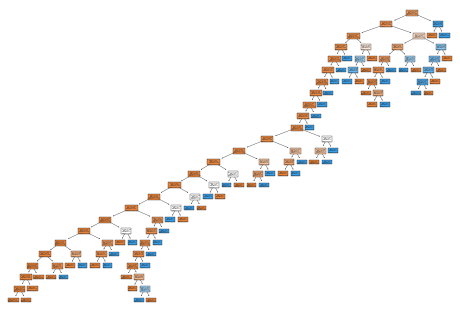

<Figure size 1584x1296 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
plot_tree(DecisionTreeClassifier(random_state=0, max_depth=25).fit(X_train, y_train), filled=True)
plt.figure(figsize=(22, 18))
# fig.set_size_inches(12, 22, forward=True)

Factor Analysis to Pair Down Factors to Two (2) Latent Factors

In [10]:
factor_data = X.set_index(y)

In [11]:
X_factor = factor_data.iloc[:, :]
y_factor = factor_data.index

### Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variables. Lower proportion is more suitable for factor analysis. KMO values range between 0 and 1. The value of KMO less than 0.6 is considered inadequate. The closer the value is to 1, the better.

In [12]:
# Using Kaiser-Meyer-Olkin (KMO) value to validate adequate sample size
kmo_all, kmo_model = calculate_kmo(X_factor)
kmo_model

0.6956533748100485

So, although this KMO value isn't ideal, it indicates that we are still able to conduct factor analysis. This value could be improved upon with a bigger sample size, or by collecting more data.

### Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not implement factor analysis.

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(factor_data)
chi_square_value, p_value

(185094.64496906733, 0.0)

In Bartlett’s test, the p-value is 0. So, the test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

# Factor Analysis : "Varimax" Rotation
The Varimax rotation is an orthogonal method of rotation that minimizes the number of variables with high loadings and that which results in uncorrelated factors.

In [14]:
# Perform factor analysis with n_factors = 2
fa = FactorAnalyzer(rotation="varimax", n_factors=2)
fa.fit(X_factor)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

Each eigenvalue measures the amount of variance created by a factor (latent or unobserved) variable that's been generated by factor analysis. A factor eigenvalue that is greater than one (1) indicates that more variance is explained by that one factor than by a single observed variable. So an eigenvalue with a value of 3.2, for example, accounts for the variance created by 3.2 observed variables.

In [15]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
f = ev > 1
print("The number of factors with eigenvalues greater than 1 : ", len(ev[f]))
ev[f]

The number of factors with eigenvalues greater than 1 :  121


array([22.89021674,  5.98668996,  3.20386361,  3.0489906 ,  2.99086094,
        2.78894536,  2.66782863,  2.63265954,  2.57539918,  2.49945639,
        2.46056752,  2.43122489,  2.40206707,  2.35563767,  2.32145504,
        2.25027546,  2.23234815,  2.2037149 ,  2.18314895,  2.17631805,
        2.14081666,  2.12269256,  2.10746521,  2.08094509,  2.0402733 ,
        2.03150214,  2.01823034,  1.99760075,  1.95307973,  1.94948454,
        1.9327699 ,  1.92191279,  1.90045554,  1.86744687,  1.85396337,
        1.83265389,  1.82046404,  1.81458158,  1.80115043,  1.79639282,
        1.78043012,  1.76309807,  1.75495572,  1.75028591,  1.73595181,
        1.72624793,  1.69588122,  1.673876  ,  1.66851579,  1.66237605,
        1.64733449,  1.62322942,  1.6202363 ,  1.610968  ,  1.59733063,
        1.59439355,  1.57529082,  1.56762205,  1.54375557,  1.53498455,
        1.52599126,  1.51955205,  1.51901358,  1.50422326,  1.4880987 ,
        1.4781587 ,  1.47237993,  1.46651738,  1.45645824,  1.44

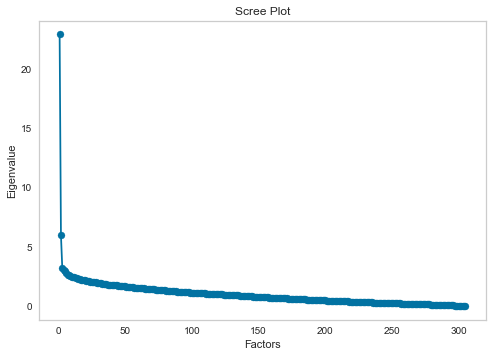

In [16]:
# Create scree plot using matplotlib
plt.scatter(range(1, X_factor.shape[1] + 1), ev)
plt.plot(range(1, X_factor.shape[1] + 1), ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [17]:
fa_loadings = pd.DataFrame(
    fa.loadings_, columns=["Fact1_loadings_", "Fact2_loadings_"]
)
fa_loadings["Original_Factors"] = list(X_factor.columns)
fa_loadings["Factor_1"] = np.where(
    fa_loadings["Fact1_loadings_"] > 0.33, "Factor_1", ""
)
fa_loadings["Factor_2"] = np.where(
    fa_loadings["Fact2_loadings_"] > 0.33, "Factor_2", ""
)
fa_loadings

,Fact1_loadings_,Fact2_loadings_,Original_Factors,Factor_1,Factor_2
0,-0.039421,-0.036524,.NET,,
1,-0.015727,-0.012012,.NET Core,,
2,-0.020052,-0.024577,API,,
3,-0.010232,-0.020936,API Design,,
4,-0.008576,-0.024497,APIs,,
...,...,...,...,...,...
300,-0.024822,-0.013831,iOS Operating System,,
301,-0.018973,-0.022697,iOS SDK,,
302,-0.005611,-0.016860,iPad,,
303,-0.066496,-0.098450,jQuery,,


In [18]:
Factor_1 = []
Factor_2 = []
for idx, row in fa_loadings.iterrows():
    if (row.Fact1_loadings_ > row.Fact2_loadings_ and  row.Fact1_loadings_ > 0.33):
        Factor_1.append(row.Original_Factors)
    elif (row.Fact2_loadings_ > row.Fact1_loadings_ and row.Fact2_loadings_ > 0.33):
        Factor_2.append(row.Original_Factors)
print("Factor_1: ", Factor_1)
print("Factor_2: ", Factor_2)

Factor_1:  ['AWS', 'Angular', 'Angular JS', 'Apache', 'Automated Testing', 'CSS', 'Databases', 'Django', 'Docker', 'Drupal', 'Elasticsearch', 'Express', 'Flux', 'Git', 'HTML', 'Heroku', 'JavaScript', 'LESS', 'Laravel', 'Meteor', 'Mobile', 'Node', 'PHP', 'Project Management', 'React', 'React Native', 'Redux', 'SASS', 'SCSS', 'Selenium', 'Shopify', 'TDD', 'Ubuntu', 'Unix', 'Version Control', 'Zend Framework', 'js']
Factor_2:  ['Architecture', 'Brand Design', 'English', 'Google Analytics', 'Graphic Design', 'Logo Design', 'Package Design', 'Requirements Gathering', 'Spoken English', 'UX Design', 'Visual', 'Wireframing', 'Written English']


Shown is the makeup of the two (2) Factors generated. By subsetting the X variable, the viability of the new facotr can be assessed via Cronbach's Alpha.

In [19]:
# Create the factors
factor1 = factor_data[Factor_1]
factor2 = factor_data[Factor_2]

### Cronbach’s alpha measures reliability, or internal consistency. In other words, it measures the similarity of a set of items within a group. A score of 0.70 and above is good, 0. 80 and above is better, and 0. 90 and above is best. 

In [20]:
# Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)

print(factor1_alpha, factor2_alpha)

(0.9633885985838833, array([0.96 , 0.967])) (0.9515198020144202, array([0.946, 0.956]))


### The .get_factor_variance() method shows the two factors to account for 16.32% of variance in the data:

In [21]:
fa.get_factor_variance()

(array([16.32059956, 11.88776037]),
 array([0.05351016, 0.03897626]),
 array([0.05351016, 0.09248643]))

In [22]:
# Transform X to two latent features returned by factor analysis
X = fa.transform(X.values)
X

array([[-6.71088640e+07,  0.00000000e+00],
       [-8.25439027e+09,  1.28849019e+10],
       [ 7.38197504e+08, -1.34217728e+09],
       ...,
       [ 7.38197504e+08, -1.34217728e+09],
       [ 3.15411661e+09, -6.30823322e+09],
       [-1.34217728e+08,  5.36870912e+08]])

In [24]:
# Instantiate the DecisionTree Object
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

DecisionTreeClassifier(random_state=0)

# Visualizing the Decision Surface

In [28]:
@register_cell_magic('handle')
def handle(line, cell):
    try:
        exec(cell)
    except Exception as e:
        print("Key Error")

In [33]:
X = pd.DataFrame(X).rename(columns={0:"Feature_1", 1:"Feature_2"})

Each input feature is an axis on a feature space, which makes sense when considering that features are often referred to as dimesnions. For each additional feature that's added to a data set, an additional axes is added as well. It follows that the x-axis and y-axis of the below generated visualization represent the two features (or dimensions) of our dataset.

Key Error


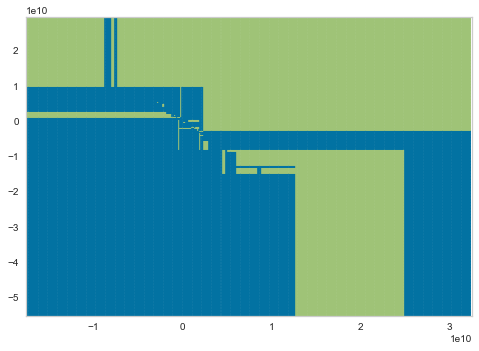

In [36]:
%%handle
viz = DecisionViz(model, x=X, y=y, show_scatter=True)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
raise KeyError()
viz.show()

The ultimate goal of classification problems is to separate the feature space so that labels are assigned to sections in the feature space as correctly as possible. Here, each color is representative of a classification, non-javascript developers and javascript developers.